In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

%matplotlib inline

# ☁ Exploratory Data Analysis on Weather Typisch Dataset ☁
### Kelompok yang beranggotakan:
1. Alif As'ad Ramadhan (5054231007)
2. Dhafin Kurniawan (5054231016)
### Tentang Data:
* Temperature : Temperatur dalam suhu Celcius `numeric`
* Humidity : Humidity (kelembapan) dalam format persentase `%` `numeric`
* Precipitation : Persentase presipitasi `%`, termasuk nilai pencilan.
* Cloud Cover : Deskripsi tentang tutupan awan `categorical`.
* Atmospheric Pressure : Tekanan atmosfer dalam hPa, mencakup rentang yang luas `numeric`.
* UV Index : Indeks UV, yang menunjukkan kekuatan radiasi ultraviolet `numeric`.
* Season : Musim saat data direkam.
* Visibility : Jarak pandang dalam kilometer `km`, termasuk nilai yang sangat rendah atau sangat tinggi `numeric`.
* Location : Jenis lokasi di mana data direkam `categorical`.
* Weather Type : Variabel target untuk klasifikasi `categorical`, yang menunjukkan jenis cuaca.

# 1. Prepare Dataset

In [60]:
df = pd.read_csv('weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Cek dan Clearing Data

In [62]:
# Lihat Deskripsi Data
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [63]:
# Cek apakah ada Missing Values
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [64]:
# cek apakah ada Data Duplikat
df.duplicated().sum()

0

In [65]:
# cek unique values
df.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

Data Sudah bersih, tidak ada `Missing Values` dan `Duplikat`

# 2. Exploratory Data Analysis (EDA)

### Tentang Data:
* Temperature : Temperatur dalam suhu Celcius `numeric`
* Humidity : Humidity (kelembapan) dalam format persentase `%` `numeric`
* Precipitation : Persentase presipitasi `%`, termasuk nilai pencilan.
* Cloud Cover : Deskripsi tentang tutupan awan `categorical`.
* Atmospheric Pressure : Tekanan atmosfer dalam hPa, mencakup rentang yang luas `numeric`.
* UV Index : Indeks UV, yang menunjukkan kekuatan radiasi ultraviolet `numeric`.
* Season : Musim saat data direkam.
* Visibility : Jarak pandang dalam kilometer `km`, termasuk nilai yang sangat rendah atau sangat tinggi `numeric`.
* Location : Jenis lokasi di mana data direkam `categorical`.
* Weather Type : Variabel target untuk klasifikasi `categorical`, yang menunjukkan jenis cuaca.

In [69]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [70]:
weather_type_by_humidity = pd.DataFrame(df.groupby('Weather Type')['Humidity'].mean().reset_index())
weather_type_by_humidity

,Weather Type,Humidity
0,Cloudy,66.528788
1,Rainy,78.397879
2,Snowy,78.510303
3,Sunny,51.406364


Text(0, 0.5, 'Rata Rata')

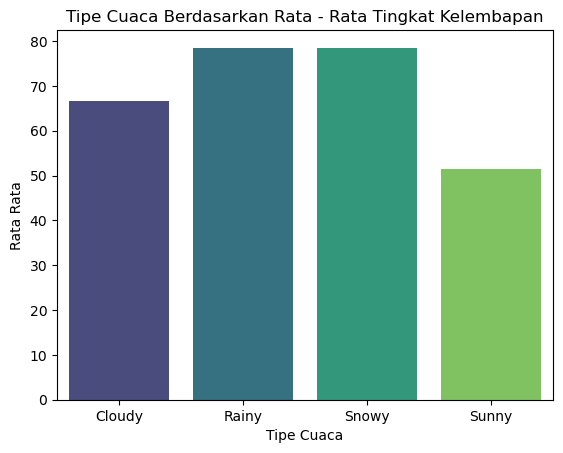

In [71]:
sns.barplot(data=weather_type_by_humidity, x='Weather Type', y='Humidity', hue='Weather Type', palette='viridis')
plt.title('Tipe Cuaca Berdasarkan Rata - Rata Tingkat Kelembapan')
plt.xlabel('Tipe Cuaca')
plt.ylabel('Rata Rata')

In [72]:
weather_type_by_wind = pd.DataFrame(df.groupby('Weather Type')['Wind Speed'].mean().reset_index())
weather_type_by_wind

,Weather Type,Wind Speed
0,Cloudy,8.601818
1,Rainy,13.677576
2,Snowy,10.976212
3,Sunny,6.073182


Text(0, 0.5, 'Rata Rata')

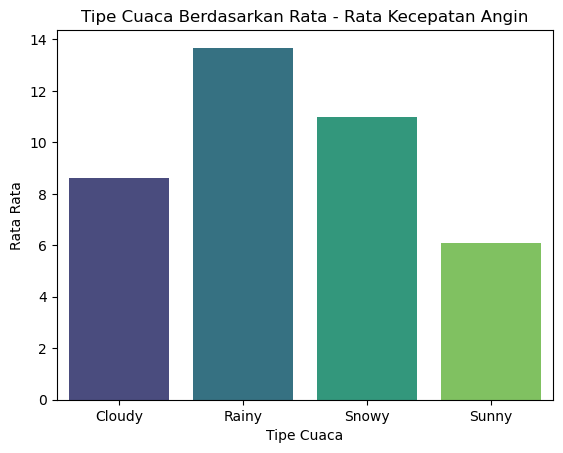

In [73]:
sns.barplot(data=weather_type_by_wind, x='Weather Type', y='Wind Speed', hue='Weather Type', palette='viridis')
plt.title('Tipe Cuaca Berdasarkan Rata - Rata Kecepatan Angin')
plt.xlabel('Tipe Cuaca')
plt.ylabel('Rata Rata')

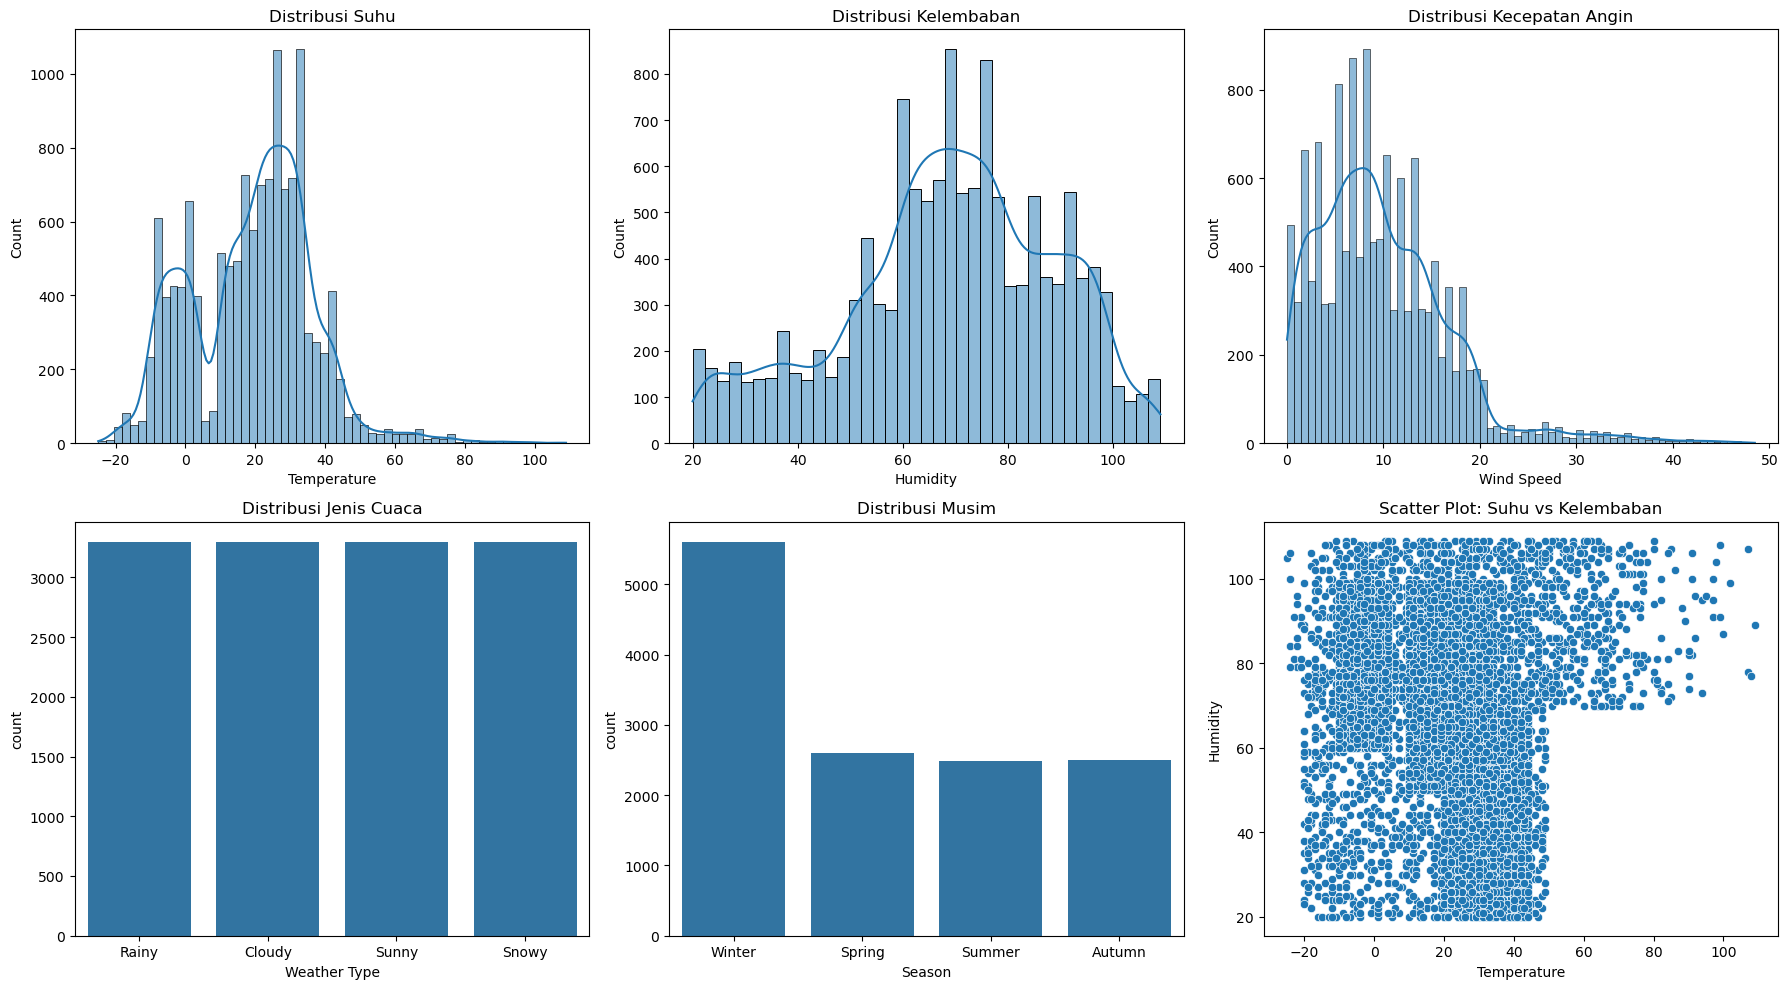

In [74]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df['Temperature'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribusi Suhu')

sns.histplot(df['Humidity'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribusi Kelembaban')

sns.histplot(df['Wind Speed'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Distribusi Kecepatan Angin')

sns.countplot(x='Weather Type', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Distribusi Jenis Cuaca')

sns.countplot(x='Season', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Distribusi Musim')

sns.scatterplot(x='Temperature', y='Humidity', data=df, ax=axs[1, 2])
axs[1, 2].set_title('Scatter Plot: Suhu vs Kelembaban')

plt.tight_layout()
plt.show()

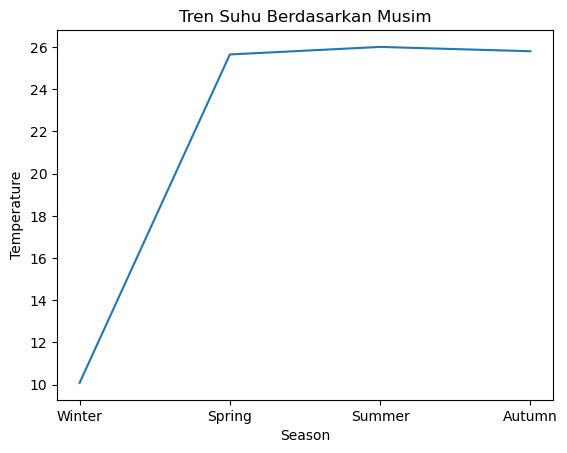

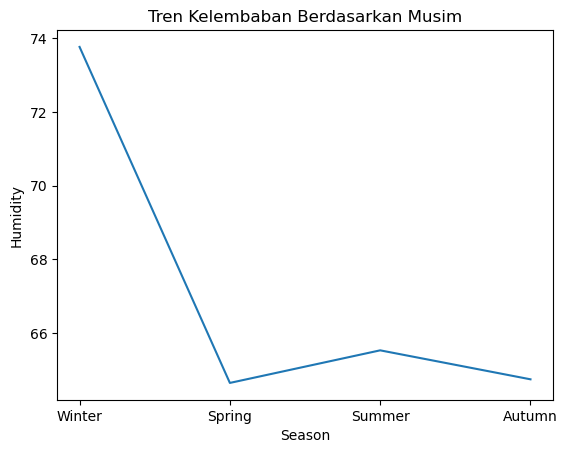

In [75]:
# Line plot untuk Tren Suhu berdasarkan Musim
sns.lineplot(x='Season', y='Temperature', data=df, errorbar=None)
plt.title('Tren Suhu Berdasarkan Musim')
plt.show()

# Line plot untuk Tren Kelembaban berdasarkan Musim
sns.lineplot(x='Season', y='Humidity', data=df, errorbar=None)
plt.title('Tren Kelembaban Berdasarkan Musim')
plt.show()

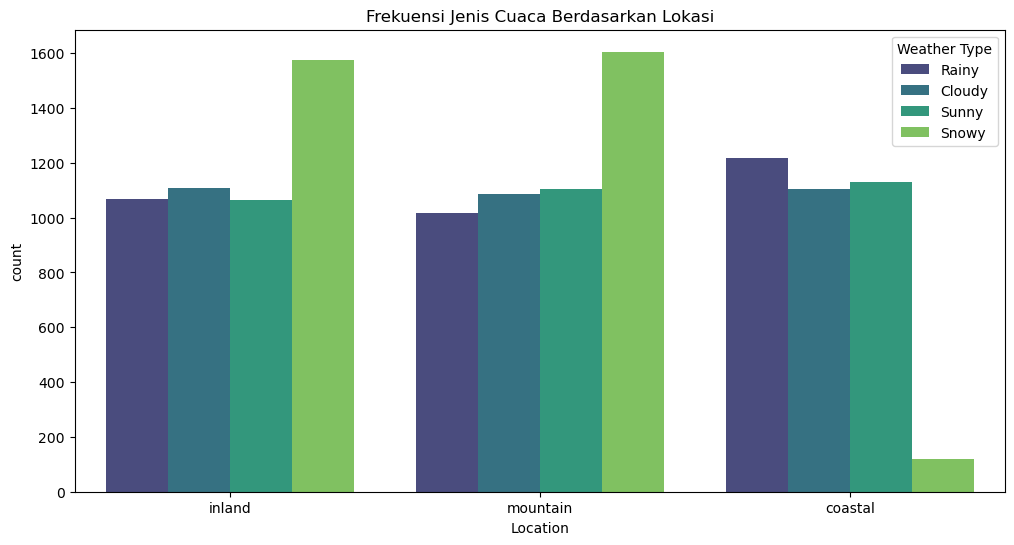

In [76]:
# Bar plot untuk jumlah jenis cuaca di setiap lokasi
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='Weather Type', data=df,palette='viridis')
plt.title('Frekuensi Jenis Cuaca Berdasarkan Lokasi')
plt.show()

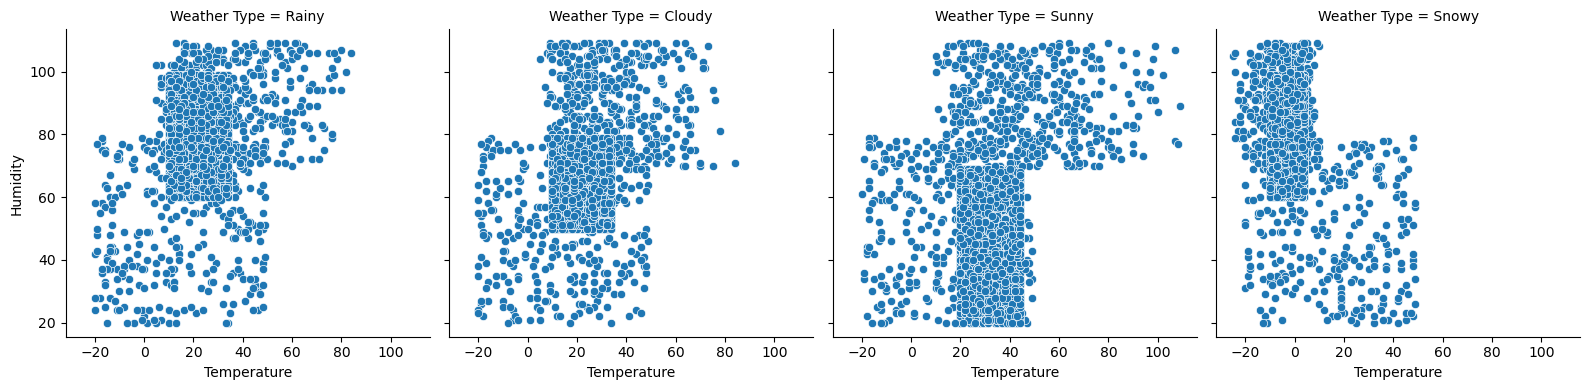

In [77]:
# Membuat FacetGrid berdasarkan Weather Type untuk scatter plot Suhu vs Kelembaban
g = sns.FacetGrid(df, col="Weather Type", height=4, aspect=1)
g.map(sns.scatterplot, "Temperature", "Humidity")
plt.show()

# 3. Feature Engineering

In [79]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [80]:
# Membuat kategori suhu dengan 3 bins
bins = [-30, 15, 30, 110]  
labels = ['Low', 'Moderate', 'High']  
df['Temperature Category'] = pd.cut(df['Temperature'], bins=bins, labels=labels)

In [81]:
tmp_cat = pd.DataFrame(df.groupby('Weather Type')['Temperature Category'].value_counts().reset_index(name='count'))
tmp_cat.head()

,Weather Type,Temperature Category,count
0,Cloudy,Moderate,1743
1,Cloudy,Low,839
2,Cloudy,High,718
3,Rainy,Moderate,1719
4,Rainy,Low,866


Text(0, 0.5, 'Count')

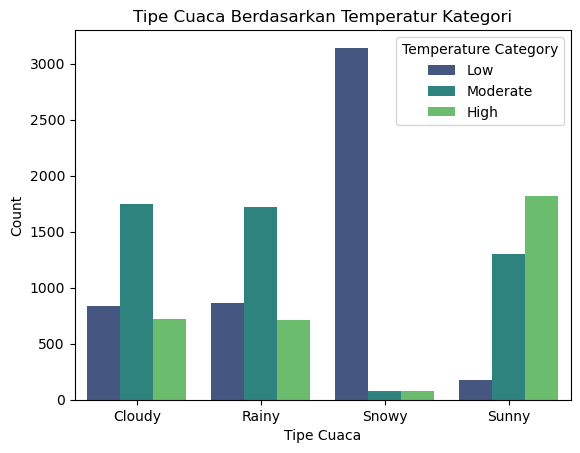

In [82]:
sns.barplot(data=tmp_cat, x='Weather Type', y='count', hue='Temperature Category', palette='viridis')
plt.title('Tipe Cuaca Berdasarkan Temperatur Kategori')
plt.xlabel('Tipe Cuaca')
plt.ylabel('Count')

# 4. Preprocessing

In [84]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature Category
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,Low
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,High
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,Moderate
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,High
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,Moderate


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Temperature           13200 non-null  float64 
 1   Humidity              13200 non-null  int64   
 2   Wind Speed            13200 non-null  float64 
 3   Precipitation (%)     13200 non-null  float64 
 4   Cloud Cover           13200 non-null  object  
 5   Atmospheric Pressure  13200 non-null  float64 
 6   UV Index              13200 non-null  int64   
 7   Season                13200 non-null  object  
 8   Visibility (km)       13200 non-null  float64 
 9   Location              13200 non-null  object  
 10  Weather Type          13200 non-null  object  
 11  Temperature Category  13200 non-null  category
dtypes: category(1), float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [86]:
df['Temperature Category'] = df['Temperature Category'].astype('object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
 11  Temperature Category  13200 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.2+ MB


Convert Data yang bertipe objek

In [89]:
# cek data yang bertipe Objek
col_obj = []
for name, konten in df.items():
    if pd.api.types.is_object_dtype(konten):
        col_obj.append(name)
        print(name)

Cloud Cover
Season
Location
Weather Type
Temperature Category


In [90]:
df_to_cnv = df[col_obj]
df_to_cnv.head()

,Cloud Cover,Season,Location,Weather Type,Temperature Category
0,partly cloudy,Winter,inland,Rainy,Low
1,partly cloudy,Spring,inland,Cloudy,High
2,clear,Spring,mountain,Sunny,Moderate
3,clear,Spring,coastal,Sunny,High
4,overcast,Winter,mountain,Rainy,Moderate


In [91]:
df_to_cnv.nunique()

Cloud Cover             4
Season                  4
Location                3
Weather Type            4
Temperature Category    3
dtype: int64

Karena Data yang ingin di convert memiliki sedikit unique values, kami menggunakan `LabelEncoder` dari Sklearn untuk melakukan conversi data bertipe objek menjadi numerik

In [93]:
from sklearn.preprocessing import LabelEncoder
#Inisialisasi LabelEncoder
le_Cloud_Cover = LabelEncoder()
le_Season = LabelEncoder()
le_Location = LabelEncoder()
le_Weather_Type = LabelEncoder()
le_Temperature_Category = LabelEncoder()

# Menggunakan .loc[] untuk menghindari SettingWithCopyWarning dan mengonversi
df_to_cnv.loc[:, 'Cloud Cover'] = le_Cloud_Cover.fit_transform(df_to_cnv['Cloud Cover'])
df_to_cnv.loc[:, 'Season'] = le_Season.fit_transform(df_to_cnv['Season'])
df_to_cnv.loc[:, 'Location'] = le_Location.fit_transform(df_to_cnv['Location'])
df_to_cnv.loc[:, 'Weather Type'] = le_Weather_Type.fit_transform(df_to_cnv['Weather Type'])
df_to_cnv.loc[:, 'Temperature Category'] = le_Temperature_Category.fit_transform(df_to_cnv['Temperature Category'])

In [94]:
df_to_cnv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cloud Cover           13200 non-null  object
 1   Season                13200 non-null  object
 2   Location              13200 non-null  object
 3   Weather Type          13200 non-null  object
 4   Temperature Category  13200 non-null  object
dtypes: object(5)
memory usage: 515.8+ KB


In [95]:
# Mengubah tipe kolom menjadi integer secara eksplisit
df_to_cnv = df_to_cnv.astype({'Cloud Cover': np.int32,
                               'Season': np.int32,
                               'Location': np.int32,
                               'Weather Type': np.int32,
                               'Temperature Category': np.int32})

In [96]:
df_to_cnv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cloud Cover           13200 non-null  int32
 1   Season                13200 non-null  int32
 2   Location              13200 non-null  int32
 3   Weather Type          13200 non-null  int32
 4   Temperature Category  13200 non-null  int32
dtypes: int32(5)
memory usage: 257.9 KB


In [97]:
col = df_to_cnv.columns
col

Index(['Cloud Cover', 'Season', 'Location', 'Weather Type',
       'Temperature Category'],
      dtype='object')

### Gabungkan data yang sudah di convert dan data sebelumnya

In [99]:
df_trans = df.copy()

In [100]:
df_trans[col] = df_to_cnv[col]

In [101]:
df_trans.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Temperature Category
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3,2
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3,0
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1,2


In [102]:
# cek tipe data 
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int32  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int32  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int32  
 10  Weather Type          13200 non-null  int32  
 11  Temperature Category  13200 non-null  int32  
dtypes: float64(5), int32(5), int64(2)
memory usage: 979.8 KB


### Semua data sudah di convert menjadi numerik

Selanjutnya Kami ingin menampilkan `Corelation Matrix`

(12.5, -0.5)

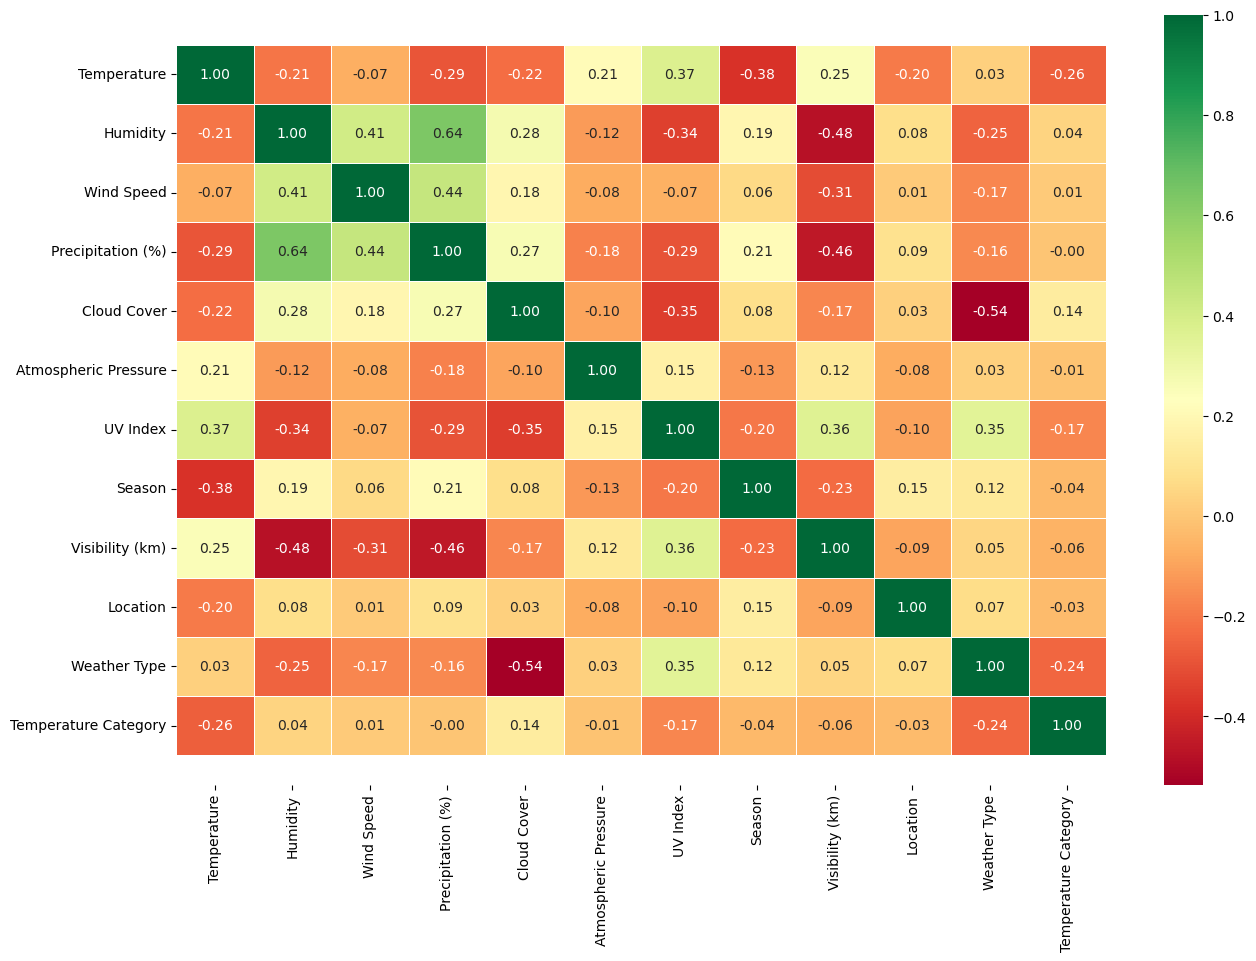

In [105]:
corr_matrix = df_trans.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Feature Selection

dari Corelation Matrix di atas, bisa di lihat jenis korelasi antar.

kita akan melakukan sleksi fitur dengan **Tidak Menggunakan** kolom yang memiliki korelasi rendah dengan **Weather Type**

In [108]:
df_trans.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type', 'Temperature Category'],
      dtype='object')

In [109]:
df_selected = df_trans[['Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'UV Index', 'Season', 'Weather Type', 'Temperature Category']]
df_selected.head()

,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Weather Type,Temperature Category
0,73,9.5,82.0,3,2,3,1,1
1,96,8.5,71.0,3,7,1,0,0
2,64,7.0,16.0,0,5,1,3,2
3,83,1.5,82.0,0,7,1,3,0
4,74,17.0,66.0,2,1,3,1,2


In [110]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Humidity              13200 non-null  int64  
 1   Wind Speed            13200 non-null  float64
 2   Precipitation (%)     13200 non-null  float64
 3   Cloud Cover           13200 non-null  int32  
 4   UV Index              13200 non-null  int64  
 5   Season                13200 non-null  int32  
 6   Weather Type          13200 non-null  int32  
 7   Temperature Category  13200 non-null  int32  
dtypes: float64(2), int32(4), int64(2)
memory usage: 618.9 KB


# 5. Modelling

In [112]:
import warnings
# Abaikan semua warning
warnings.simplefilter("ignore")

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### Split data menjadi Data test dan data train

In [115]:
X = df_selected.drop('Weather Type', axis=1)
y = df_selected['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
len(X_train), len(X_test)

(10560, 2640)

Kami menggunakan 3 model
1. RandomForestClassifier
2. KNeighborsClassifier
3. LogisticRegression

In [118]:
model = {'RandomForestClassifier': RandomForestClassifier(),
         'KNeighborsClassifier': KNeighborsClassifier(),
         'LogisticRegression': LogisticRegression()}

def fit_and_score(model, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in model.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [119]:
threshold = 0.5  # Sesuaikan ambang batas berdasarkan kebutuhan Anda
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

In [120]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Humidity              13200 non-null  int64  
 1   Wind Speed            13200 non-null  float64
 2   Precipitation (%)     13200 non-null  float64
 3   Cloud Cover           13200 non-null  int32  
 4   UV Index              13200 non-null  int64  
 5   Season                13200 non-null  int32  
 6   Weather Type          13200 non-null  int32  
 7   Temperature Category  13200 non-null  int32  
dtypes: float64(2), int32(4), int64(2)
memory usage: 618.9 KB


Kami akan menggunakan `RandomForest` sebagai model karena `RandomForest` memiliki skor terbesar diantara tiga model lainnya

In [122]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
# cek score pada Random forest\
model.score(X_test, y_test)

0.8962121212121212

# 6. Tuning HyperParameter

In [125]:
# Mendefinisikan parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': np.arange(100, 2001, 100),                
    'max_depth': [None, 5, 10, 15, 20],                       
    'min_samples_split': [2, 5, 10],                          
    'min_samples_leaf': [1, 2, 4],                            
    'max_features': ['auto', 'sqrt', 'log2'],                
    'bootstrap': [True, False]                                
}

In [126]:
%%time
#Set up the random search with 4-fold cross-validation
rf_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42),
                              param_distributions=param_grid_rf,
                              n_iter=20,
                              cv=5,
                              verbose=True,
                              random_state=42)

# Fit the model dengan data pelatihan
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 3min 2s
Wall time: 3min 29s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])},
                   random_state=42, verbose=True)

In [127]:
rf_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [128]:
rf_model.score(X_test, y_test)

0.8954545454545455

In [129]:
ideal_model = RandomForestClassifier(n_estimators=2000,
                                     min_samples_split=2,
                                     min_samples_leaf=2,
                                     max_features='log2',
                                     max_depth=20,
                                     bootstrap=False)
ideal_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_leaf=2, n_estimators=2000)

### Jadi Score terbaik model kami saat ini adalah

In [131]:
score = ideal_model.score(X_test, y_test)

In [132]:
print(f'Jadi Score dari model kami saat ini adalah : {score * 100:.2f}')

Jadi Score dari model kami saat ini adalah : 89.77


# 7. Evaluasi Model

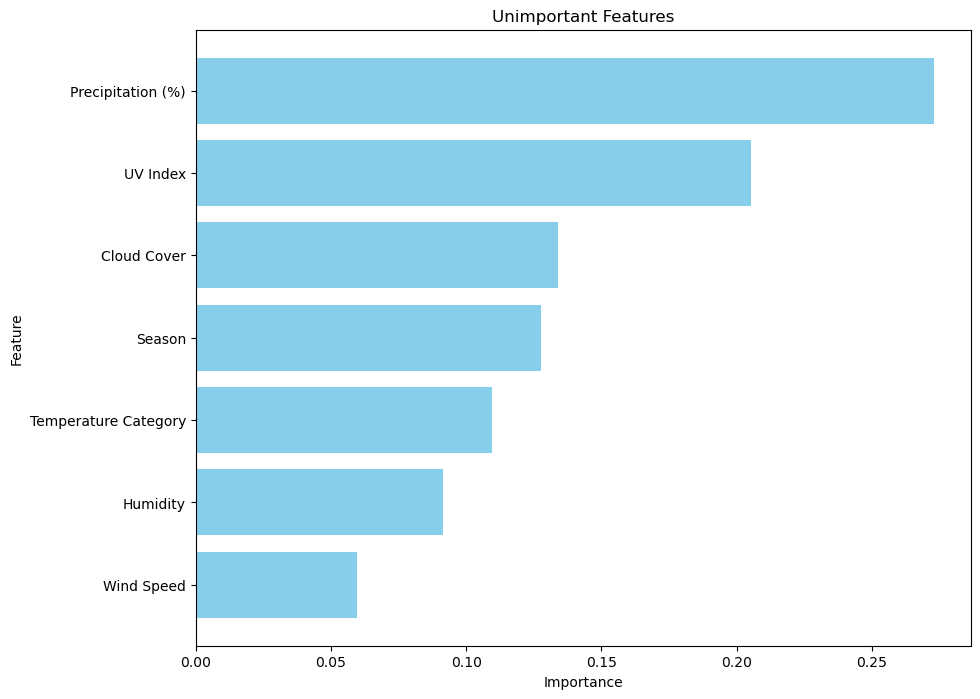

In [134]:
importance = ideal_model.feature_importances_

# Membuat DataFrame untuk visualisasi
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Mengurutkan berdasarkan pentingnya fitur (ascending)
importance_df = importance_df.sort_values(by='Importance')

# Visualisasi fitur yang tidak penting
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Unimportant Features')
plt.show()

In [135]:
# Hasil prediksi Model 
test_preds = ideal_model.predict(X_test)
test_preds

array([3, 3, 3, ..., 2, 1, 2])

In [136]:
eval = pd.DataFrame(data=test_preds, columns=['Predictions'])
eval.head()

,Predictions
0,3
1,3
2,3
3,3
4,2


In [137]:
y_test

2731     3
3378     3
7883     3
13168    3
246      2
        ..
10878    2
3369     3
5120     2
1637     1
11629    1
Name: Weather Type, Length: 2640, dtype: int32

In [138]:
len(y_test), len(eval)

(2640, 2640)